In [ ]:
import pandas as pd
df = pd.read_csv(r"D:\credit Risk Prediction\credit_risk_dataset.csv") #dataset path
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.info() #to get the information about the dataset
df.describe() #to get the statistical summary of the dataset
df.isnull().sum() #to check for missing values in the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
df["loan_status"].value_counts() #to get the count of each unique value in the "loan_status" column
df["loan_status"].value_counts(normalize=True) #to get the percentage of each unique value in the "loan_status" column


loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64

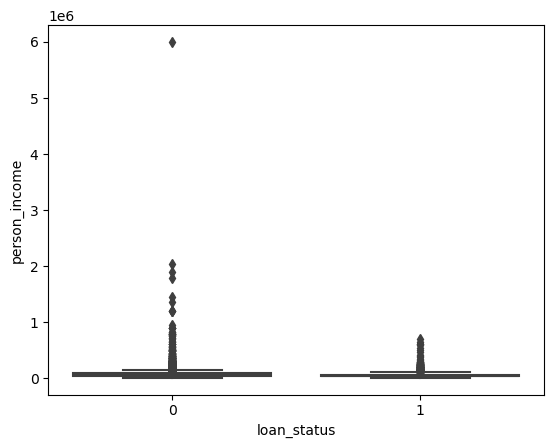

In [ ]:
#Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="loan_status", y="person_income", data=df) 
plt.show()

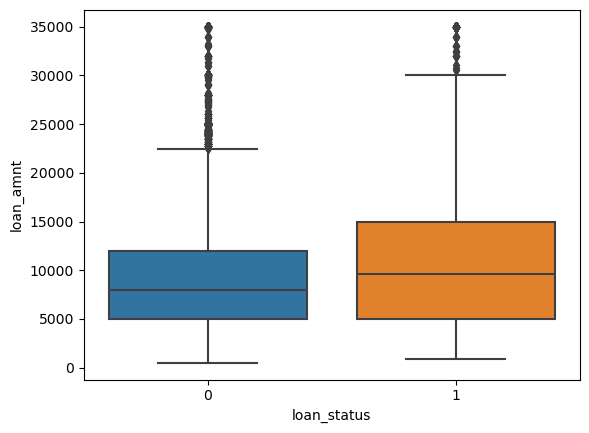

In [8]:
sns.boxplot(x="loan_status", y="loan_amnt", data=df) #to visualize the distribution of loan amounts for each loan status
plt.show()


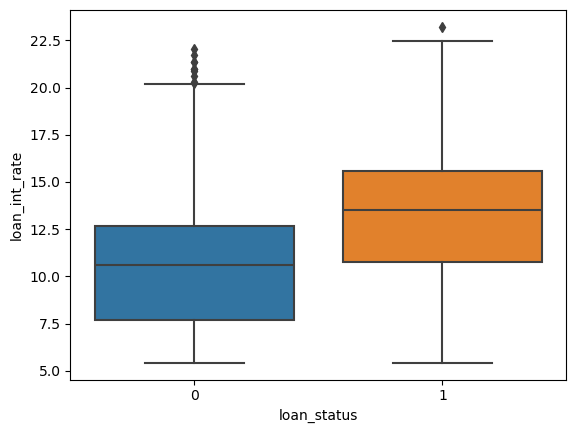

In [9]:
sns.boxplot(x="loan_status", y="loan_int_rate", data=df) #to visualize the distribution of loan interest rates for each loan status
plt.show()


In [10]:
pd.crosstab(df["person_home_ownership"], df["loan_status"], normalize="index")


loan_status,0,1
person_home_ownership,,
MORTGAGE,0.874293,0.125707
OTHER,0.691589,0.308411
OWN,0.925310,0.074690
RENT,0.684300,0.315700


In [11]:
df["debt_income_ratio"] = df["loan_amnt"] / df["person_income"]


In [12]:
df["stable_employment"] = (df["person_emp_length"] >= 5).astype(int)


In [13]:
df["age_group"] = pd.cut(
    df["person_age"],
    bins=[18,25,35,50,100],
    labels=["18-25","26-35","36-50","50+"]
)


In [14]:
df = pd.get_dummies(df, drop_first=True)


In [23]:
from sklearn.model_selection import train_test_split

X = df.drop("loan_status", axis=1)
y = df["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [17]:
df.isnull().sum().sort_values(ascending=False)


loan_int_rate                  3116
person_emp_length               895
person_age                        0
loan_intent_MEDICAL               0
age_group_36-50                   0
age_group_26-35                   0
cb_person_default_on_file_Y       0
loan_grade_G                      0
loan_grade_F                      0
loan_grade_E                      0
loan_grade_D                      0
loan_grade_C                      0
loan_grade_B                      0
loan_intent_VENTURE               0
loan_intent_PERSONAL              0
loan_intent_HOMEIMPROVEMENT       0
person_income                     0
loan_intent_EDUCATION             0
person_home_ownership_RENT        0
person_home_ownership_OWN         0
person_home_ownership_OTHER       0
stable_employment                 0
debt_income_ratio                 0
cb_person_cred_hist_length        0
loan_percent_income               0
loan_status                       0
loan_amnt                         0
age_group_50+               

In [18]:
df["person_emp_length"].fillna(0, inplace=True)


In [19]:
df["loan_int_rate"].fillna(df["loan_int_rate"].median(), inplace=True)


In [22]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [31]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])
pipeline.fit(X_train, y_train)



Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


[[4866  229]
 [ 600  822]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      5095
           1       0.78      0.58      0.66      1422

    accuracy                           0.87      6517
   macro avg       0.84      0.77      0.79      6517
weighted avg       0.87      0.87      0.87      6517

ROC-AUC: 0.8766011188266812


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5095
           1       0.96      0.73      0.82      1422

    accuracy                           0.93      6517
   macro avg       0.94      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517

ROC-AUC: 0.931386359589736


In [28]:
df.info()
df["loan_status"].value_counts(normalize=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   32581 non-null  int64  
 1   person_income                32581 non-null  int64  
 2   person_emp_length            32581 non-null  float64
 3   loan_amnt                    32581 non-null  int64  
 4   loan_int_rate                32581 non-null  float64
 5   loan_status                  32581 non-null  int64  
 6   loan_percent_income          32581 non-null  float64
 7   cb_person_cred_hist_length   32581 non-null  int64  
 8   debt_income_ratio            32581 non-null  float64
 9   stable_employment            32581 non-null  int32  
 10  person_home_ownership_OTHER  32581 non-null  bool   
 11  person_home_ownership_OWN    32581 non-null  bool   
 12  person_home_ownership_RENT   32581 non-null  bool   
 13  loan_intent_EDUC

loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"   # important for imbalance
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]


In [35]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nROC-AUC:", roc_auc_score(y_test, y_prob_rf))


Confusion Matrix:
 [[5064   31]
 [ 404 1018]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5095
           1       0.97      0.72      0.82      1422

    accuracy                           0.93      6517
   macro avg       0.95      0.85      0.89      6517
weighted avg       0.94      0.93      0.93      6517


ROC-AUC: 0.9335133863071404


In [38]:
rf_cv = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1   # important: use all CPU cores
)

cv_scores = cross_val_score(
    rf_cv,
    X,
    y,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

print("CV ROC-AUC:", cv_scores)
print("Mean:", cv_scores.mean())


CV ROC-AUC: [0.93397377 0.87642732 0.91773733 0.89583819 0.92283282]
Mean: 0.9093618831761286


In [37]:
import numpy as np
from sklearn.metrics import classification_report

thresholds = np.arange(0.2, 0.8, 0.05)

for t in thresholds:
    y_custom = (y_prob_rf >= t).astype(int)
    print(f"\nThreshold: {t}")
    print(classification_report(y_test, y_custom))



Threshold: 0.2
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      5095
           1       0.69      0.82      0.75      1422

    accuracy                           0.88      6517
   macro avg       0.82      0.86      0.84      6517
weighted avg       0.89      0.88      0.89      6517


Threshold: 0.25
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5095
           1       0.78      0.79      0.79      1422

    accuracy                           0.91      6517
   macro avg       0.86      0.87      0.86      6517
weighted avg       0.91      0.91      0.91      6517


Threshold: 0.3
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5095
           1       0.84      0.77      0.80      1422

    accuracy                           0.92      6517
   macro avg       0.89      0.86      0.88      6517
weighted avg       0.92  